#SHARE PRICE PREDICTION
####IMPORTING ALL THE REQUIRED LIBRARIES

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
import joblib
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####READING THE DATASETS

In [4]:
amd=pd.read_csv('AMD (1980 -11.07.2023).csv')
asus=pd.read_csv('ASUS (2000 - 11.07.2023).csv')
intel=pd.read_csv('INTEL (1980 - 11.07.2023).csv')
motorola=pd.read_csv('Motorola Solutions (MSI) (1962 -11.07.2023).csv')
nvidia=pd.read_csv('NVIDIA (1999 -11.07.2023).csv')

*Displaying first 5 rows of all the dataframes in order to ensure that the data is loaded correctly*

In [5]:
amd.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
1,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
2,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
3,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800
4,1980-03-24,0.0,2.916667,2.635417,2.666667,2.666667,436800


In [6]:
asus.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-05,438.747223,446.535675,436.151154,438.747223,89.092613,6.106176e+09
1,2000-01-06,440.045380,447.833862,436.151154,437.449310,88.829048,6.545984e+09
2,2000-01-07,432.256927,433.555084,425.766632,428.362701,86.983925,4.764317e+09
3,2000-01-10,434.853271,454.324158,434.853271,450.429901,91.464920,1.199988e+10
4,2000-01-11,463.410767,463.410767,442.641449,443.939606,90.146988,1.423350e+10


In [7]:
intel.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-18,0.325521,0.328125,0.322917,0.322917,0.183718,17068800
1,1980-03-19,0.330729,0.335938,0.330729,0.330729,0.188162,18508800
2,1980-03-20,0.330729,0.334635,0.329427,0.329427,0.187421,11174400
3,1980-03-21,0.322917,0.322917,0.317708,0.317708,0.180754,12172800
4,1980-03-24,0.316406,0.316406,0.311198,0.311198,0.177050,8966400


In [8]:
motorola.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-03,0.0,1.444702,1.427952,1.436327,0.630355,77611
1,1962-01-04,0.0,1.438421,1.411202,1.423765,0.624842,59701
2,1962-01-05,0.0,1.432140,1.394452,1.415390,0.621167,107462
3,1962-01-08,0.0,1.432140,1.390264,1.390264,0.610140,89551
4,1962-01-09,0.0,1.402827,1.356764,1.356764,0.595438,83581


In [9]:
nvidia.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415743,51048000
1,1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383487,34320000
2,1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382293,24436800
3,1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381098,22752000
4,1999-01-29,0.415365,0.416667,0.395833,0.395833,0.363177,24403200


####DATA PREPARATION

*Checking for null values*

In [10]:
amd.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
asus.isnull().sum()

Date           0
Open         123
High         123
Low          123
Close        123
Adj Close    123
Volume       123
dtype: int64

In [12]:
motorola.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
intel.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
nvidia.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

####DATA MANIPULATION

In [15]:
asus=asus.dropna()

In [ ]:
asus.isnull().sum()

In [16]:
data_list=[amd, asus, intel, motorola, nvidia]
for data in data_list:
    data["Date"]=pd.to_datetime(data["Date"])

####RESAMPLING THE DATA

In [17]:
data_list = [amd,asus, intel, motorola, nvidia]

names=[0,1,2,3,4]
index=0
for data in data_list:
  dates=data["Date"]
  data["Company"]=np.repeat(names[index],len(data))
  data["Year"]=dates.dt.year
  data["Month"]=dates.dt.month
  data["Day"]=dates.dt.day
  index+=1

####TRAIN TEST SPLITTING

In [18]:
data_list=[amd,asus,motorola,intel,nvidia]
test_data=[]
train_data=[]
for data in data_list:
  train=data[:int(0.8*len(data))]
  test=data[int(0.8*len(data)):]
  train_data.append(train)
  test_data.append(test)
  print(test.shape,train.shape)

(2184, 11) (8735, 11)
(1150, 11) (4596, 11)
(3097, 11) (12387, 11)
(2184, 11) (8735, 11)
(1231, 11) (4923, 11)


In [19]:
train_data=pd.concat(train_data)
test_data=pd.concat(test_data)
print(train_data.shape,test_data.shape)

(39376, 11) (9846, 11)


In [20]:
x_train=train_data[["Open","High","Low","Volume","Year","Month","Day","Company"]]
x_test=test_data[["Open","High","Low","Volume","Year","Month","Day","Company"]]
y_train=train_data["Close"]
y_test=test_data["Close"]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape,y_test.shape)

(39376, 8)
(9846, 8)
(39376,) (9846,)


####EXPLORATORY DATA ANALYSIS

*Descriptive Statistical*

In [21]:
amd.describe(include="all")

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,Month,Day
count,10919,10919.000000,10919.000000,10919.000000,10919.000000,10919.000000,1.091900e+04,10919.0,10919.000000,10919.000000,10919.000000
unique,10919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1980-03-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,1980-03-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-07-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,16.842664,17.510743,16.761635,17.138932,17.138932,1.846495e+07,0.0,2001.338126,6.526605,15.738438
std,NaN,23.317716,23.609612,22.615398,23.121619,23.121619,2.815631e+07,0.0,12.509742,3.422874,8.748574
min,NaN,0.000000,1.690000,1.610000,1.620000,1.620000,0.000000e+00,0.0,1980.000000,1.000000,1.000000
25%,NaN,4.960000,5.437500,5.125000,5.300000,5.300000,1.226100e+06,0.0,1991.000000,4.000000,8.000000


In [22]:
asus.describe(include="all")

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,Month,Day
count,5746,5746.000000,5746.000000,5746.000000,5746.000000,5746.000000,5.746000e+03,5746.0,5746.000000,5746.000000,5746.000000
unique,5746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2000-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2000-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-07-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,290.489678,293.667370,287.055492,290.235818,128.518523,1.016665e+09,1.0,2011.146189,6.584929,15.835712
std,NaN,75.957579,76.739552,74.935856,75.602517,66.079585,2.177426e+09,0.0,6.866389,3.413409,8.715091
min,NaN,127.106941,130.196335,127.106941,130.196335,28.863441,0.000000e+00,1.0,2000.000000,1.000000,1.000000
25%,NaN,234.528175,237.000000,231.808762,234.500000,76.379619,1.696000e+06,1.0,2005.000000,4.000000,8.000000


In [23]:
intel.describe(include="all")

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,Month,Day
count,10919,10919.000000,10919.000000,10919.000000,10919.000000,10919.000000,1.091900e+04,10919.0,10919.000000,10919.000000,10919.000000
unique,10919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1980-03-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,1980-03-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-07-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,19.897342,20.169676,19.627548,19.896781,14.668655,5.052754e+07,2.0,2001.338126,6.526605,15.738438
std,NaN,17.487968,17.729974,17.252020,17.487397,14.781238,3.481933e+07,0.0,12.509742,3.422874,8.748574
min,NaN,0.218750,0.218750,0.216146,0.216146,0.122972,0.000000e+00,2.0,1980.000000,1.000000,1.000000
25%,NaN,1.343750,1.367188,1.320313,1.343750,0.764502,2.713025e+07,2.0,1991.000000,4.000000,8.000000


In [24]:
motorola.describe(include="all")

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,Month,Day
count,15484,15484.000000,15484.000000,15484.000000,15484.000000,15484.000000,1.548400e+04,15484.0,15484.000000,15484.000000,15484.000000
unique,15484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1962-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,1962-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-07-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,45.915441,47.352928,46.153413,46.760641,38.499299,1.992720e+06,3.0,1992.285456,6.504133,15.735598
std,NaN,56.804625,56.774068,55.509647,56.157440,53.186087,2.344350e+06,0.0,17.735967,3.432078,8.743104
min,NaN,0.000000,0.866821,0.808196,0.845884,0.375586,0.000000e+00,3.0,1962.000000,1.000000,1.000000
25%,NaN,3.806477,5.188366,5.050177,5.119272,2.622875,5.086000e+05,3.0,1977.000000,4.000000,8.000000


In [25]:
nvidia.describe(include="all")

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,Month,Day
count,6154,6154.000000,6154.000000,6154.000000,6154.000000,6154.000000,6.154000e+03,6154.0,6154.000000,6154.000000,6154.000000
unique,6154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1999-01-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,1999-01-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-07-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,34.055888,34.707315,33.394796,34.080465,33.818979,6.120887e+07,4.0,2010.792168,6.497725,15.732044
std,NaN,67.420090,68.760909,66.069289,67.472837,67.479411,4.385313e+07,0.0,7.064137,3.419204,8.761435
min,NaN,0.348958,0.355469,0.333333,0.341146,0.313002,1.968000e+06,4.0,1999.000000,1.000000,1.000000
25%,NaN,2.682084,2.768125,2.612500,2.685417,2.463874,3.443320e+07,4.0,2005.000000,4.000000,8.000000


*Visual Analysis*

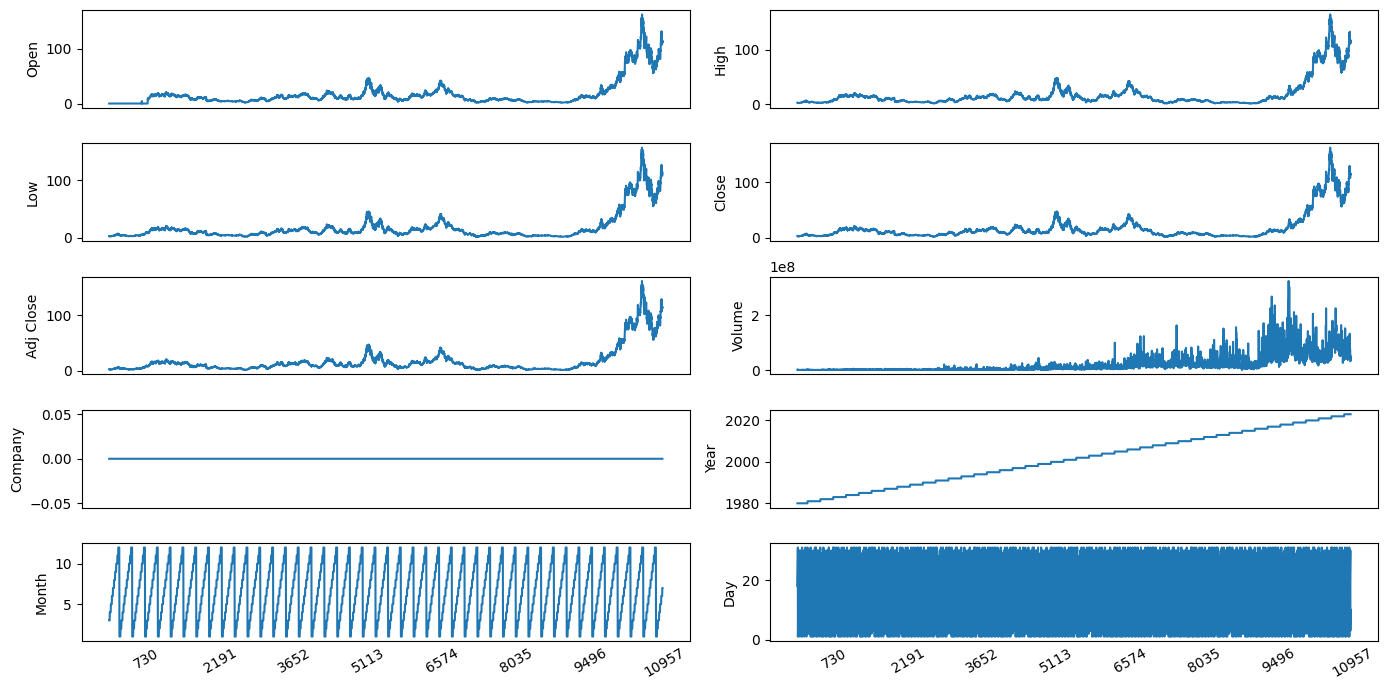

In [26]:
import matplotlib.dates as mdates

df_plot=amd.drop(columns=['Date'])
ncols=2
nrows=int(round(df_plot.shape[1]/ncols,0))

fig,ax=plt.subplots(nrows=nrows,ncols=ncols,sharex=True,figsize=(14,7))
for i,ax in enumerate(fig.axes):
  sns.lineplot(data=df_plot.iloc[:,i],ax=ax)
  ax.tick_params(axis="x",rotation=30,labelsize=10,length=0)
  ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()


####MODEL BUILDING

In [27]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
print('Test Score:',lr.score(x_test,y_test))
print('Train Score:',lr.score(x_train,y_train))


Test Score: 0.9998391287096715
Train Score: 0.9998961451078356


In [29]:
y_pred=lr.predict(x_test)
print("r2_score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

r2_score: 0.9998391287096715
MAE: 0.7044060658381885


In [ ]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

In [ ]:
print('Test score:',dt.score(x_test,y_test))
print('Train score:',dt.score(x_train,y_train))

In [ ]:
y_pred = dt.predict(x_test)
print('r2_score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

In [ ]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)

In [ ]:
print('Test score:',etr.score(x_test,y_test))
print('Train score:',etr.score(x_train,y_train))

In [ ]:
y_pred = etr.predict(x_test)
print('r2_score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

In [ ]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

In [ ]:
print('Test score:',rf.score(x_test,y_test))
print('Train score:',rf.score(x_train,y_train))

In [ ]:
y_pred = rf.predict(x_test)
print('r2_score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

In [30]:
amd_dates=test_data[test_data["Company"]==0]["Date"]
amd_pred=lr.predict(x_test[x_test["Company"]==0])
amd_orig=test_data[test_data["Company"]==0]["Close"]

asus_dates=test_data[test_data["Company"]==1]["Date"]
asus_pred=lr.predict(x_test[x_test["Company"]==1])
asus_orig=test_data[test_data["Company"]==1]["Close"]

intel_dates=test_data[test_data["Company"]==2]["Date"]
intel_pred=lr.predict(x_test[x_test["Company"]==2])
intel_orig=test_data[test_data["Company"]==2]["Close"]

msi_dates=test_data[test_data["Company"]==3]["Date"]
msi_pred=lr.predict(x_test[x_test["Company"]==3])
msi_orig=test_data[test_data["Company"]==3]["Close"]

nvidia_dates=test_data[test_data["Company"]==4]["Date"]
nvidia_pred=lr.predict(x_test[x_test["Company"]==4])
nvidia_orig=test_data[test_data["Company"]==4]["Close"]

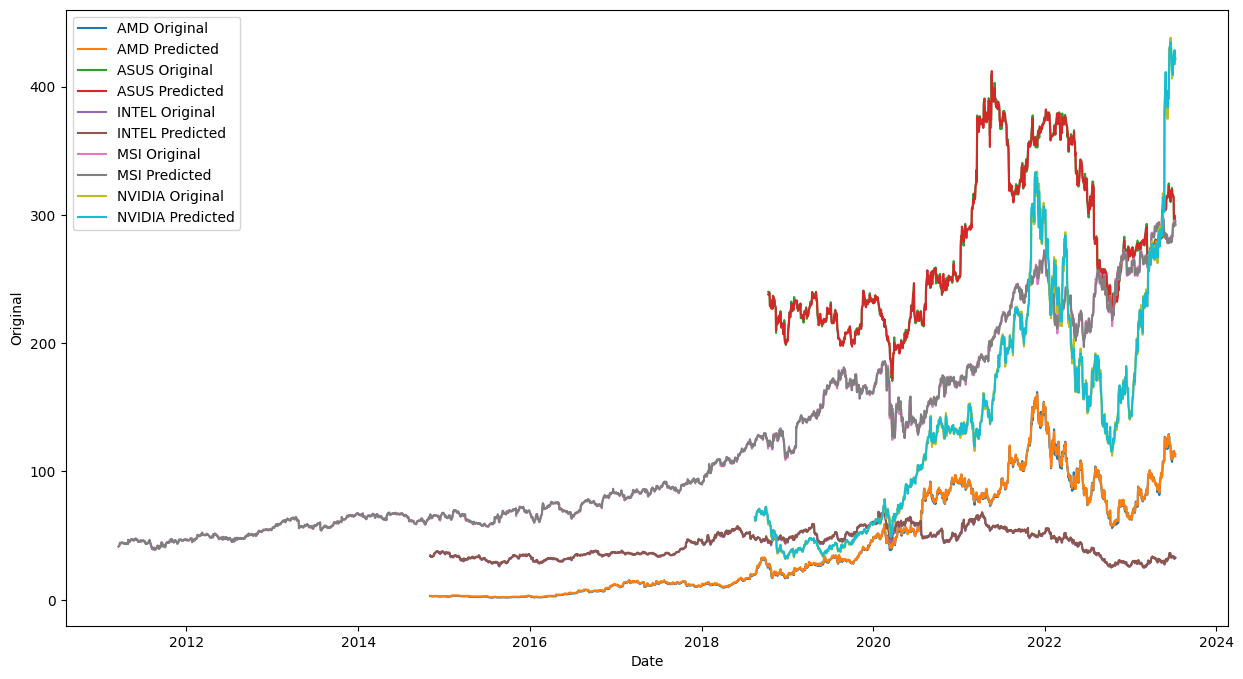

In [31]:
# Combine data for AMD
amd_data = {'Date': amd_dates, 'Original': amd_orig, 'Predicted': amd_pred}
amd_df = pd.DataFrame(amd_data)

# Combine data for ASUS
asus_data = {'Date': asus_dates, 'Original': asus_orig, 'Predicted': asus_pred}
asus_df = pd.DataFrame(asus_data)

# Combine data for INTEL
intel_data = {'Date': intel_dates, 'Original': intel_orig, 'Predicted': intel_pred}
intel_df = pd.DataFrame(intel_data)

# Combine data for MSI
msi_data = {'Date': msi_dates, 'Original': msi_orig, 'Predicted': msi_pred}
msi_df = pd.DataFrame(msi_data)

# Combine data for NVIDIA
nvidia_data = {'Date': nvidia_dates, 'Original': nvidia_orig, 'Predicted': nvidia_pred}
nvidia_df = pd.DataFrame(nvidia_data)

# Plotting
plt.figure(figsize=(15, 8))

sns.lineplot(x='Date', y='Original', data=amd_df, label='AMD Original')
sns.lineplot(x='Date', y='Predicted', data=amd_df, label='AMD Predicted')

sns.lineplot(x='Date', y='Original', data=asus_df, label='ASUS Original')
sns.lineplot(x='Date', y='Predicted', data=asus_df, label='ASUS Predicted')

sns.lineplot(x='Date', y='Original', data=intel_df, label='INTEL Original')
sns.lineplot(x='Date', y='Predicted', data=intel_df, label='INTEL Predicted')

sns.lineplot(x='Date', y='Original', data=msi_df, label='MSI Original')
sns.lineplot(x='Date', y='Predicted', data=msi_df, label='MSI Predicted')

sns.lineplot(x='Date', y='Original', data=nvidia_df, label='NVIDIA Original')
sns.lineplot(x='Date', y='Predicted', data=nvidia_df, label='NVIDIA Predicted')

plt.legend()
plt.show()


####SAVING MODEL

In [32]:
import pickle as pkl
lr = LinearRegression()
pkl.dump(lr,open("lr.pkl","wb"))

####We cannot retrieve the summary as it is for a linear regression model as Linear Regression does not have a summary method, rather we can do this:

In [33]:
# Retrieve the coefficients and intercept
coefficients = lr.coef_
intercept = lr.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-3.36395823e-01  7.41379999e-01  5.92276888e-01 -2.92547098e-11
  2.02227313e-02 -2.09789875e-05  1.61112864e-04 -1.64439633e-02]
Intercept: -40.45453510288843
